🎯 CUSTOM CLEANING: ai_job_dataset, ai_job_market, linkedin_jobs_analysis
📁 Loading your datasets...
✅ Loaded 3 datasets

📈 AI_JOB_DATASET:
   Rows: 15,000, Columns: 19
   Columns: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']

📈 AI_JOB_MARKET:
   Rows: 2,000, Columns: 12
   Columns: ['job_id', 'company_name', 'industry', 'job_title', 'skills_required', 'experience_level', 'employment_type', 'location', 'salary_range_usd', 'posted_date', 'company_size', 'tools_preferred']

📈 LINKEDIN_JOBS:
   Rows: 1,052, Columns: 11
   Columns: ['title', 'company', 'location', 'link', 'salary', 'job_type', 'time_posted', 'skills', 'category', 'scraped_date', 'source']
🧹 Cleaning ai_job_dataset...
   After clean

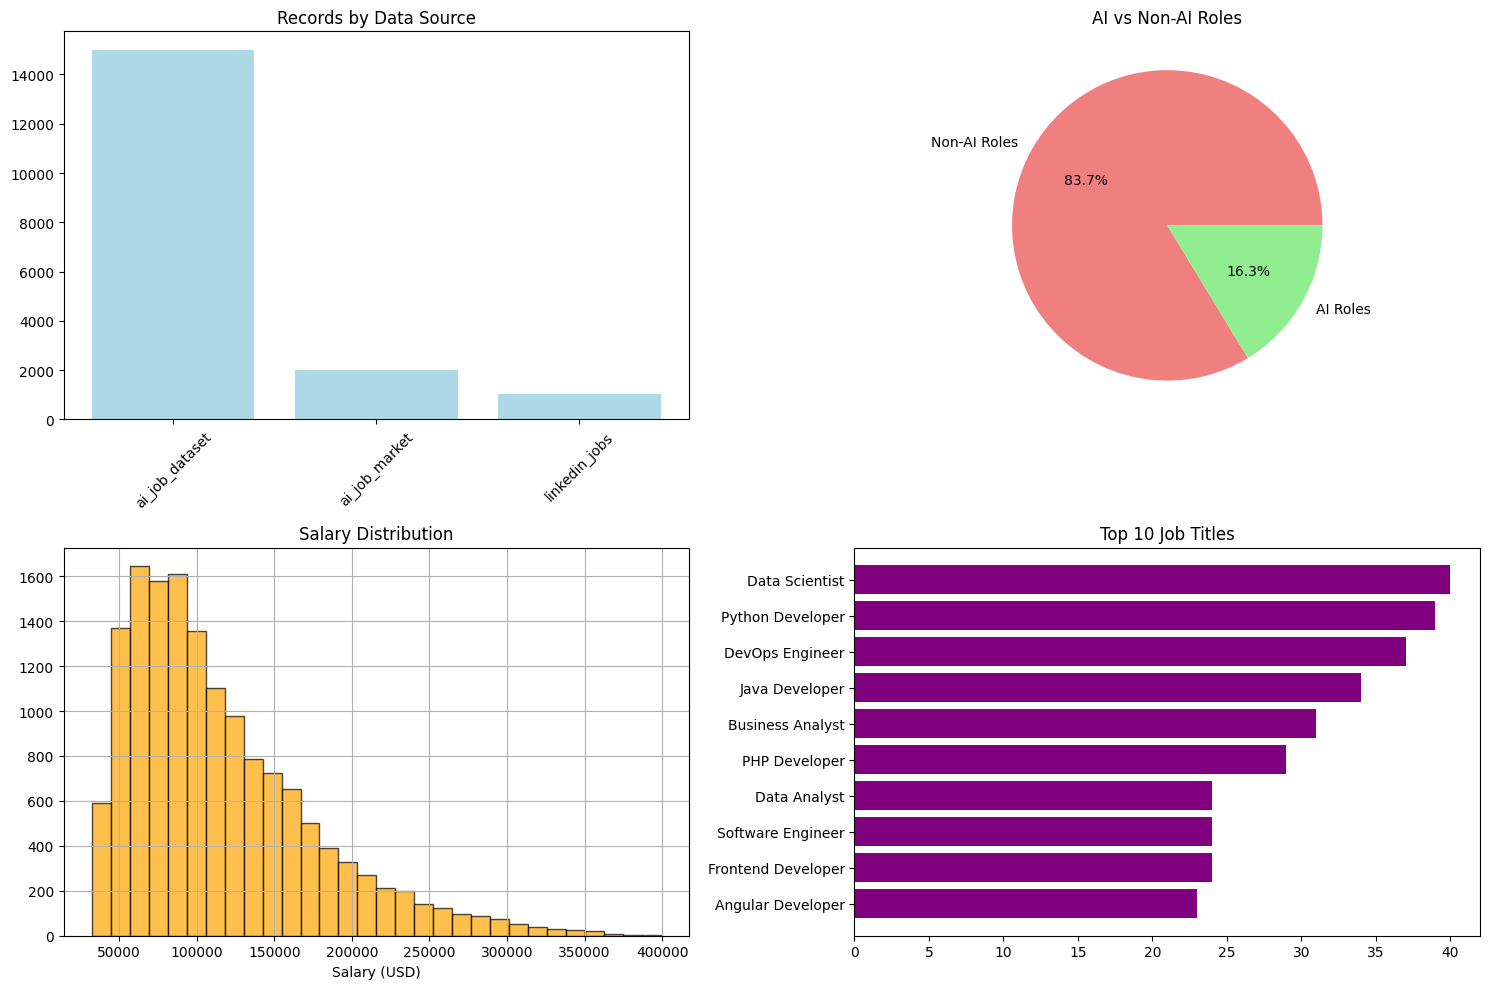


✅ CUSTOM DATA CLEANING COMPLETED!
📁 All cleaned data saved to: C:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\AI Job Market Analysis\data\processed
📊 Overview saved to: C:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\AI Job Market Analysis\images\custom_data_overview.png

📈 SUMMARY STATISTICS:
Total records: 18,052
Datasets combined: 3
Data sources: {'ai_job_dataset': 15000, 'ai_job_market': 2000, 'linkedin_jobs': 1052}
AI roles: 83.7% of total
Average salary: $115,349
Median salary: $99,705

🎯 READY FOR EDA AND DASHBOARD DEVELOPMENT!


In [2]:
# CUSTOM DATA CLEANING FOR YOUR AI JOB DATASETS - FIXED VERSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

print("🎯 CUSTOM CLEANING: ai_job_dataset, ai_job_market, linkedin_jobs_analysis")
print("=" * 70)

# 1. LOAD YOUR SPECIFIC DATASETS WITH CORRECT PATH
print("📁 Loading your datasets...")

# Use your actual data path - FIXED PATH
data_path = r'C:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\AI Job Market Analysis\Data'

df_ai_jobs = pd.read_csv(os.path.join(data_path, 'ai_job_dataset.csv'))
df_market = pd.read_csv(os.path.join(data_path, 'ai_job_market.csv'))
df_linkedin = pd.read_csv(os.path.join(data_path, 'linkedin_jobs_analysis.csv'))

datasets = {
    'ai_job_dataset': df_ai_jobs,
    'ai_job_market': df_market, 
    'linkedin_jobs': df_linkedin
}

print(f"✅ Loaded {len(datasets)} datasets")

# 2. DISPLAY INITIAL STRUCTURE
for name, df in datasets.items():
    print(f"\n📈 {name.upper()}:")
    print(f"   Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
    print(f"   Columns: {list(df.columns)}")

# 3. IMPROVED CLEANING FUNCTION
def clean_dataset(df, dataset_name):
    """
    Apply universal cleaning steps to any job dataset
    """
    print(f"🧹 Cleaning {dataset_name}...")
    df_clean = df.copy()
    
    # Standardize column names
    df_clean.columns = [col.strip().lower().replace(' ', '_') for col in df_clean.columns]
    
    # Remove completely empty rows and columns
    df_clean = df_clean.dropna(how='all')
    df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^unnamed')]
    
    # Add dataset identifier
    df_clean['data_source'] = dataset_name
    
    print(f"   After cleaning: {df_clean.shape}")
    return df_clean

# 4. APPLY CLEANING
cleaned_datasets = {}
for name, df in datasets.items():
    cleaned_datasets[name] = clean_dataset(df, name)

# 5. IMPROVED CUSTOM PROCESSING - NO DUPLICATE COLUMNS
print("\n🔧 Applying IMPROVED custom processing...")

final_datasets = {}

for name, df in cleaned_datasets.items():
    print(f"\nProcessing {name}...")
    df_processed = df.copy()
    
    # Track which columns we've already renamed to avoid duplicates
    renamed_columns = {}
    
    for col in df_processed.columns:
        col_lower = col.lower()
        
        # Standardize job title columns (only rename if not already done)
        if any(keyword in col_lower for keyword in ['title', 'job', 'position', 'role']) and 'job_title' not in renamed_columns:
            if col != 'job_title':  # Only rename if it's not already job_title
                df_processed = df_processed.rename(columns={col: 'job_title'})
                renamed_columns['job_title'] = True
                
        # Standardize company columns (only rename if not already done)  
        elif any(keyword in col_lower for keyword in ['company', 'employer', 'organization']) and 'company' not in renamed_columns:
            if col != 'company':  # Only rename if it's not already company
                df_processed = df_processed.rename(columns={col: 'company'})
                renamed_columns['company'] = True
                
        # Standardize location columns (only rename if not already done)
        elif any(keyword in col_lower for keyword in ['location', 'country', 'city', 'remote']) and 'location' not in renamed_columns:
            if col != 'location':  # Only rename if it's not already location
                df_processed = df_processed.rename(columns={col: 'location'})
                renamed_columns['location'] = True
                
        # Standardize salary columns (only rename if not already done)
        elif any(keyword in col_lower for keyword in ['salary', 'compensation', 'pay']) and 'salary' not in renamed_columns:
            if col != 'salary':  # Only rename if it's not already salary
                df_processed = df_processed.rename(columns={col: 'salary'})
                renamed_columns['salary'] = True
                
        # Standardize skill columns (only rename if not already done)
        elif any(keyword in col_lower for keyword in ['skill', 'technology', 'requirement']) and 'skills' not in renamed_columns:
            if col != 'skills':  # Only rename if it's not already skills
                df_processed = df_processed.rename(columns={col: 'skills'})
                renamed_columns['skills'] = True
    
    # Remove duplicate columns that might have been created
    df_processed = df_processed.loc[:, ~df_processed.columns.duplicated()]
    
    final_datasets[name] = df_processed
    print(f"   Final columns: {list(df_processed.columns)}")

# 6. CREATE MASTER DATASET WITH IMPROVED LOGIC
print("\n🔄 Creating master dataset...")

master_columns = ['job_title', 'company', 'location', 'salary', 'skills', 'data_source']
master_data = pd.DataFrame()

for name, df in final_datasets.items():
    available_columns = [col for col in master_columns if col in df.columns]
    
    if available_columns:
        df_subset = df[available_columns].copy()
        
        # Fill missing columns with NaN
        for col in set(master_columns) - set(available_columns):
            df_subset[col] = np.nan
        
        # Ensure no duplicate columns before concatenation
        df_subset = df_subset.loc[:, ~df_subset.columns.duplicated()]
        
        master_data = pd.concat([master_data, df_subset], ignore_index=True, sort=False)

print(f"Master dataset shape: {master_data.shape}")

# 7. ENHANCE MASTER DATA
print("\n⚡ Enhancing master data with AI-specific features...")

# Extract AI-related roles
ai_keywords = [
    'ai', 'artificial intelligence', 'machine learning', 'ml', 'data scientist',
    'deep learning', 'nlp', 'computer vision', 'neural network', 'tensorflow',
    'pytorch', 'llm', 'large language model', 'generative ai'
]

def detect_ai_role(text):
    if pd.isna(text):
        return False
    text_str = str(text).lower()
    return any(keyword in text_str for keyword in ai_keywords)

if 'job_title' in master_data.columns:
    master_data['is_ai_role'] = master_data['job_title'].apply(detect_ai_role)
    ai_roles = master_data['is_ai_role'].sum()
    print(f"🤖 AI-related roles detected: {ai_roles} ({ai_roles/len(master_data)*100:.1f}%)")

# Salary processing
if 'salary' in master_data.columns:
    # Convert salary to numeric if possible
    master_data['salary_clean'] = pd.to_numeric(master_data['salary'], errors='coerce')
    valid_salaries = master_data['salary_clean'].notna().sum()
    print(f"💰 Valid salaries: {valid_salaries}")

# 8. SAVE RESULTS - FIXED PATHS
print("\n💾 Saving cleaned data...")

# Define project root path - FIXED
project_root = r'C:\Users\Icey_m_a\Documents\Icey\Icey\School\Python\AI Job Market Analysis'
processed_path = os.path.join(project_root, 'data', 'processed')
images_path = os.path.join(project_root, 'images')

# Create folders if they don't exist
os.makedirs(processed_path, exist_ok=True)
os.makedirs(images_path, exist_ok=True)

# Save individual cleaned datasets
for name, df in final_datasets.items():
    output_path = os.path.join(processed_path, f'cleaned_{name}.csv')
    df.to_csv(output_path, index=False)
    print(f"✅ {output_path}")

# Save master dataset
if len(master_data) > 0:
    master_output_path = os.path.join(processed_path, 'master_ai_jobs.csv')
    master_data.to_csv(master_output_path, index=False)
    print(f"✅ {master_output_path}")

# 9. VISUALIZE RESULTS
print("\n📊 Creating overview visualizations...")

plt.figure(figsize=(15, 10))

# Plot 1: Data source distribution
plt.subplot(2, 2, 1)
source_counts = master_data['data_source'].value_counts()
plt.bar(source_counts.index, source_counts.values, color='lightblue')
plt.title('Records by Data Source')
plt.xticks(rotation=45)

# Plot 2: AI roles detection (if available)
if 'is_ai_role' in master_data.columns:
    plt.subplot(2, 2, 2)
    ai_counts = master_data['is_ai_role'].value_counts()
    plt.pie(ai_counts.values, labels=['Non-AI Roles', 'AI Roles'], autopct='%1.1f%%',
            colors=['lightcoral', 'lightgreen'])
    plt.title('AI vs Non-AI Roles')

# Plot 3: Salary distribution (if available)
if 'salary_clean' in master_data.columns and master_data['salary_clean'].notna().sum() > 0:
    plt.subplot(2, 2, 3)
    master_data['salary_clean'].dropna().hist(bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Salary Distribution')
    plt.xlabel('Salary (USD)')

# Plot 4: Top job titles (if available)
if 'job_title' in master_data.columns:
    plt.subplot(2, 2, 4)
    job_counts = master_data['job_title'].value_counts().head(10)
    plt.barh(range(len(job_counts)), job_counts.values, color='purple')
    plt.yticks(range(len(job_counts)), job_counts.index)
    plt.title('Top 10 Job Titles')
    plt.gca().invert_yaxis()

plt.tight_layout()

# Save visualization with fixed path
image_output_path = os.path.join(images_path, 'custom_data_overview.png')
plt.savefig(image_output_path, dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("✅ CUSTOM DATA CLEANING COMPLETED!")
print(f"📁 All cleaned data saved to: {processed_path}")
print(f"📊 Overview saved to: {image_output_path}")

# 10. SUMMARY STATISTICS
print("\n📈 SUMMARY STATISTICS:")
print(f"Total records: {len(master_data):,}")
print(f"Datasets combined: {len(final_datasets)}")
print(f"Data sources: {master_data['data_source'].value_counts().to_dict()}")

if 'is_ai_role' in master_data.columns:
    ai_pct = master_data['is_ai_role'].mean() * 100
    print(f"AI roles: {ai_pct:.1f}% of total")

if 'salary_clean' in master_data.columns:
    valid_salaries = master_data['salary_clean'].dropna()
    if len(valid_salaries) > 0:
        print(f"Average salary: ${valid_salaries.mean():,.0f}")
        print(f"Median salary: ${valid_salaries.median():,.0f}")

print("\n🎯 READY FOR EDA AND DASHBOARD DEVELOPMENT!")